In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [123]:
weather_data = pd.read_csv("~/projects/ava-assignment/data/weather_data/weather.csv")

In [124]:
df_melted = weather_data.melt(
    id_vars=["Country", "year", "month", "element"], 
    value_vars=[f"d{i}" for i in range(1, 32)], 
    var_name="day", 
    value_name="temperature"
)
df_melted["day"] = df_melted["day"].str.extract(r"(\d+)").astype(int)
df_melted["date"] = pd.to_datetime(df_melted[["year", "month", "day"]], errors="coerce")

df_valid = df_melted.dropna(subset=["date"]).copy()

df_pivot = df_valid.pivot_table(
    index='date',
    columns='element',
    values='temperature',
    dropna=False,
).reset_index()

df_pivot.columns.name = None

df_pivot = df_pivot.sort_values('date')

df_pivot = df_pivot.dropna(subset=["tmax", "tmin"], how="all")

In [125]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 29 to 309
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33 non-null     datetime64[ns]
 1   tmax    33 non-null     float64       
 2   tmin    33 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.0 KB


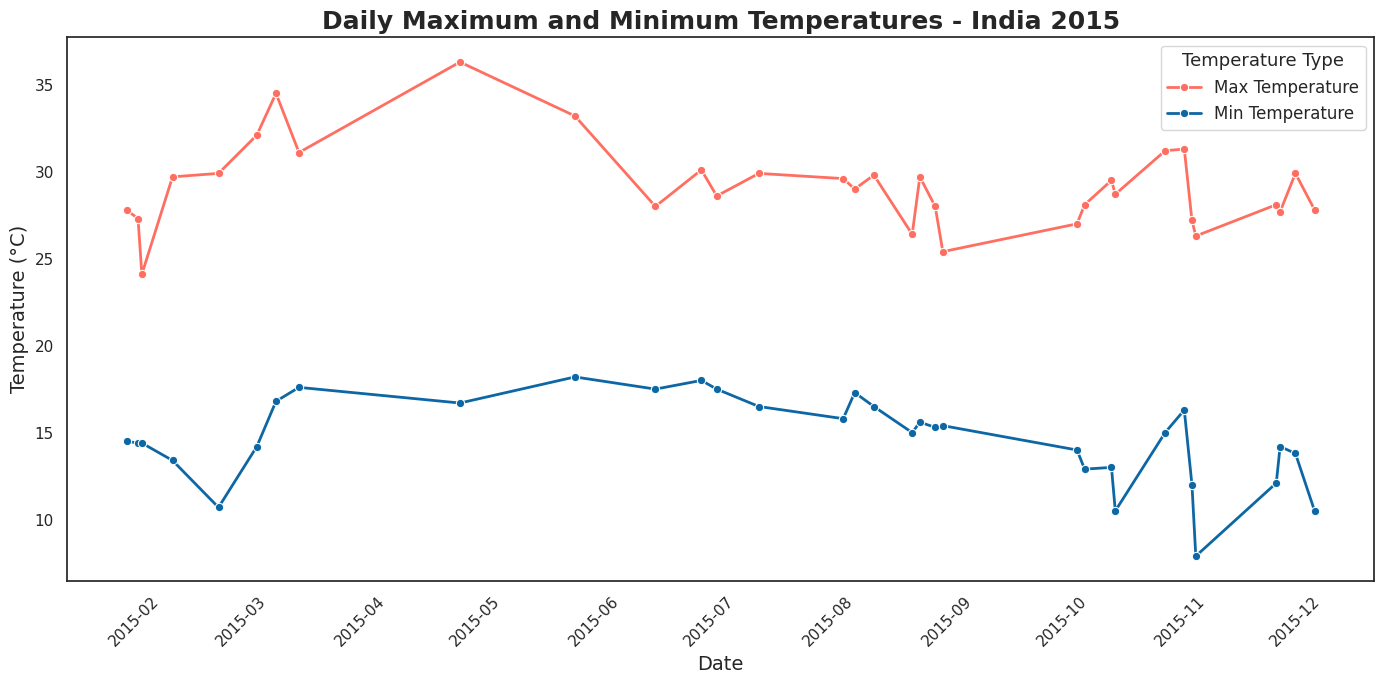

In [126]:
sns.set_theme(style='white')

plt.figure(figsize=(14, 7))

sns.lineplot(
    data=df_pivot,
    x='date',
    y='tmax',
    label='Max Temperature',
    color='#FF6F61',
    linewidth=2,
    marker='o',
    markersize=6
)

sns.lineplot(
    data=df_pivot,
    x='date',
    y='tmin',
    label='Min Temperature',
    color='#0d67a5',
    linewidth=2,
    marker='o',
    markersize=6
)

plt.title('Daily Maximum and Minimum Temperatures - India 2015', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(title='Temperature Type', fontsize=12, title_fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("export/min_max_temperature.png", dpi=300, bbox_inches="tight")
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Melt the dataframe to convert from wide to long format
df_melted = df.melt(id_vars=['Country', 'year', 'month', 'element'], 
                    value_vars=[f'd{i}' for i in range(1, 32)],
                    var_name='day', value_name='temperature')

# Convert the day column to integer
df_melted['day'] = df_melted['day'].str.extract('(\d+)').astype(int)

# Drop NaN values (missing temperatures)
df_melted = df_melted.dropna(subset=['temperature'])

# Create a date column for easier plotting
df_melted['date'] = pd.to_datetime(df_melted[['year', 'month', 'day']])

# Separate maximum and minimum temperatures
df_tmax = df_melted[df_melted['element'] == 'tmax']
df_tmin = df_melted[df_melted['element'] == 'tmin']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_tmax['date'], df_tmax['temperature'], label='Tmax (°C)', color='red', marker='o')
plt.plot(df_tmin['date'], df_tmin['temperature'], label='Tmin (°C)', color='blue', marker='o')

# Adding titles and labels
plt.title('Daily Temperature Variation (Tmax and Tmin) in 2015 - India')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_42847/492582967.py:13: SyntaxWarning: invalid escape sequence '\d'
  df_melted['day'] = df_melted['day'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_42847/492582967.py:13: SyntaxWarning: invalid escape sequence '\d'
  df_melted['day'] = df_melted['day'].str.extract('(\d+)').astype(int)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your_file.csv'